# Lecture 7 of 9 - Data Wrangling and More Summarising Data

In this lecture we will explore cyclist count data from Brisbane in 2021. The data was gathered from the Brisbane City Council's open data portal.

In [1]:
# standard imports for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the 'bike-ped-auto-counts-2021.csv' dataset. Ensure the Date column is imported in datetime format and is set as the index of the dataframe. Inspect the data to get a feel for the format.

In [2]:
# import and inspect data
auto_counts = pd.read_csv('Data/bike-ped-auto-counts-2021.csv', index_col=['Date'], parse_dates=['Date'])
auto_counts

,"A001, Bicentennial Bikeway, Auchenflower _Pedestrian","A001, Bicentennial Bikeway, Auchenflower _Cyclist","A019, Bicentennial Bikeway, Milton _Pedestrian","A019, Bicentennial Bikeway, Milton _Cyclist","A002, Bishop Street, Kelvin Grove _Pedestrian","A002, Bishop Street, Kelvin Grove _Cyclist","A023, Botanic Gardens, City _Pedestrian","A023, Botanic Gardens, City _Cyclist","A003, Ekibin Park, Greenslopes _Pedestrian","A003, Ekibin Park, Greenslopes _Cyclist",...,"A028, Indooroopilly Riverwalk, Indooroopilly _Pedestrian","A028, Indooroopilly Riverwalk, Indooroopilly _Cyclist","A029, Lytton Road, East Brisbane _Cyclist","A200,_Cyclist City Link Cycleway (Edward St - Charlotte to Mary), City","A200,_Scooter City Link Cycleway (Edward St - Charlotte to Mary), City","A201,_Cyclist City Link Cycleway (Elizabeth St - Creek to Edward), City","A202,_Cyclist City Link Cycleway (Elizabeth St - Edward to Albert), City","A202,_Scooter City Link Cycleway (Elizabeth St - Edward to Albert), City","A203,_Cyclist City Link Cycleway (Victoria Bridge), City","A203,_Scooter City Link Cycleway (Victoria Bridge), City"
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1375.0,1718.0,1180.0,1780.0,1030,96,2955.0,1518.0,732,186.0,...,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,1668.0,2649.0,1445.0,2865.0,795,98,3267.0,2136.0,672,243.0,...,NaN,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,1939.0,3062.0,1251.0,3217.0,518,163,3172.0,2448.0,762,251.0,...,NaN,NaN,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,2007.0,2587.0,1218.0,2780.0,469,147,2583.0,1792.0,843,215.0,...,NaN,NaN,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,1570.0,3474.0,1080.0,3648.0,389,134,1959.0,2163.0,636,179.0,...,NaN,NaN,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,NaN,NaN,1304.0,2211.0,421,103,2798.0,1457.0,389,215.0,...,851.0,752.0,202,NaN,NaN,158.0,201.0,292.0,215.0,749.0
2021-12-28,NaN,NaN,1478.0,1273.0,414,89,3390.0,1210.0,348,205.0,...,796.0,503.0,147,NaN,NaN,214.0,308.0,481.0,265.0,975.0
2021-12-29,NaN,NaN,1530.0,2596.0,499,118,3519.0,1945.0,407,310.0,...,771.0,971.0,328,NaN,NaN,226.0,347.0,464.0,269.0,1032.0


In [3]:
auto_counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 60 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   A001, Bicentennial Bikeway, Auchenflower  _Pedestrian                     287 non-null    float64
 1   A001, Bicentennial Bikeway, Auchenflower  _Cyclist                        289 non-null    float64
 2   A019, Bicentennial Bikeway, Milton  _Pedestrian                           317 non-null    float64
 3   A019, Bicentennial Bikeway, Milton  _Cyclist                              317 non-null    float64
 4   A002, Bishop Street, Kelvin Grove  _Pedestrian                            365 non-null    int64  
 5   A002, Bishop Street, Kelvin Grove  _Cyclist                               365 non-null    int64  
 6   A023, Botanic Gardens, City  _Pedestrian       

## Updating Data
There are lots of autocount locations in the data, so let's focus our analysis on a select few. Select the Maritime Museum and Annerley Rd locations. Rename the columns to ones that are more convenient to use. Add day and month columns to the data.

In [4]:
# updating data (adding, removing and renaming columns)
auto_counts.columns

Index(['A001, Bicentennial Bikeway, Auchenflower  _Pedestrian',
       'A001, Bicentennial Bikeway, Auchenflower  _Cyclist',
       'A019, Bicentennial Bikeway, Milton  _Pedestrian',
       'A019, Bicentennial Bikeway, Milton  _Cyclist',
       'A002, Bishop Street, Kelvin Grove  _Pedestrian',
       'A002, Bishop Street, Kelvin Grove  _Cyclist',
       'A023, Botanic Gardens, City  _Pedestrian',
       'A023, Botanic Gardens, City  _Cyclist',
       'A003, Ekibin Park, Greenslopes  _Pedestrian',
       'A003, Ekibin Park, Greenslopes  _Cyclist',
       'A004, Eleanor Schonell Br Cyclists, St Lucia  _Cyclist',
       'A004, Eleanor Schonell Br Pedestrians, St Lucia  _Pedestrian',
       'A005, Go Between Br Cyclists, South Brisbane   _Cyclist',
       'A005, Go Between Br Pedestrians, South Brisbane  _Pedestrian',
       'A006, Granville St Bridge, Herston  _Pedestrian',
       'A006, Granville St Bridge, Herston  _Cyclist',
       'A020, Gympie Rd (Marchant Park), Chermside  _Pedestri

In [5]:
# selecting columns
auto_counts = auto_counts[['A025, Maritime Museum, South Brisbane  _Pedestrian',
       'A025, Maritime Museum, South Brisbane  _Cyclist',
       'A026, Annerley Rd, South Brisbane  _Cyclist']]
auto_counts

,"A025, Maritime Museum, South Brisbane _Pedestrian","A025, Maritime Museum, South Brisbane _Cyclist","A026, Annerley Rd, South Brisbane _Cyclist"
Date,,,
2021-01-01,5710.0,1738.0,265
2021-01-02,6485.0,2538.0,462
2021-01-03,6525.0,2974.0,479
2021-01-04,4720.0,2865.0,538
2021-01-05,4690.0,3353.0,637
...,...,...,...
2021-12-27,4644.0,1970.0,351
2021-12-28,3073.0,910.0,224
2021-12-29,3875.0,1311.0,397


In [6]:
# changing column names
name_changes = {'A025, Maritime Museum, South Brisbane  _Pedestrian': 'Pedestrian',
               'A025, Maritime Museum, South Brisbane  _Cyclist': 'Cyclist',
               'A026, Annerley Rd, South Brisbane  _Cyclist': 'Cyclist_other'}
auto_counts = auto_counts.rename(columns=name_changes)
auto_counts

,Pedestrian,Cyclist,Cyclist_other
Date,,,
2021-01-01,5710.0,1738.0,265
2021-01-02,6485.0,2538.0,462
2021-01-03,6525.0,2974.0,479
2021-01-04,4720.0,2865.0,538
2021-01-05,4690.0,3353.0,637
...,...,...,...
2021-12-27,4644.0,1970.0,351
2021-12-28,3073.0,910.0,224
2021-12-29,3875.0,1311.0,397


In [7]:
# add month column
auto_counts['Month'] = auto_counts.index.month
auto_counts

,Pedestrian,Cyclist,Cyclist_other,Month
Date,,,,
2021-01-01,5710.0,1738.0,265,1
2021-01-02,6485.0,2538.0,462,1
2021-01-03,6525.0,2974.0,479,1
2021-01-04,4720.0,2865.0,538,1
2021-01-05,4690.0,3353.0,637,1
...,...,...,...,...
2021-12-27,4644.0,1970.0,351,12
2021-12-28,3073.0,910.0,224,12
2021-12-29,3875.0,1311.0,397,12


In [8]:
# add day of week column
auto_counts['Day'] = auto_counts.index.day_name()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
auto_counts['Day'] = pd.Categorical(auto_counts.Day, categories=day_names, ordered=True)
auto_counts

,Pedestrian,Cyclist,Cyclist_other,Month,Day
Date,,,,,
2021-01-01,5710.0,1738.0,265,1,Friday
2021-01-02,6485.0,2538.0,462,1,Saturday
2021-01-03,6525.0,2974.0,479,1,Sunday
2021-01-04,4720.0,2865.0,538,1,Monday
2021-01-05,4690.0,3353.0,637,1,Tuesday
...,...,...,...,...,...
2021-12-27,4644.0,1970.0,351,12,Monday
2021-12-28,3073.0,910.0,224,12,Tuesday
2021-12-29,3875.0,1311.0,397,12,Wednesday


## Cleaning Data
Now clean the data. This typically requires the following:
* Check whether data types are appropriate
* Check for missing values
* Inspect the data for incorrect values or outliers
* Do format checks where appropriate

In [9]:
# data types
auto_counts.dtypes

Pedestrian        float64
Cyclist           float64
Cyclist_other       int64
Month               int32
Day              category
dtype: object

In [10]:
# missing values
auto_counts.isna().sum()

Pedestrian       151
Cyclist          151
Cyclist_other      0
Month              0
Day                0
dtype: int64

<Axes: xlabel='Date'>

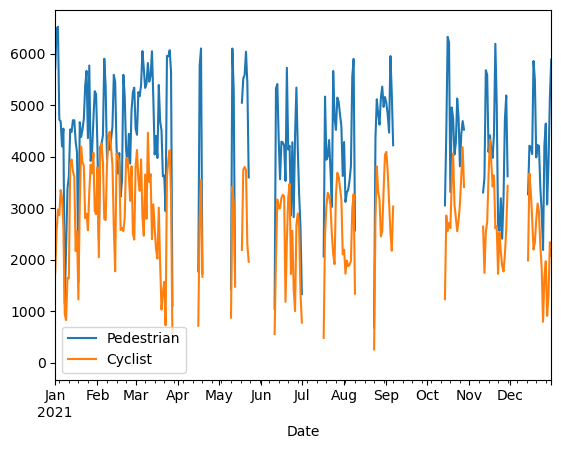

In [11]:
# seeing missing values
auto_counts.plot(y=['Pedestrian', 'Cyclist'])

In [12]:
auto_counts.Pedestrian.mean()

np.float64(4363.154205607477)

In [13]:
# don't use sum aggregate when you have missing data - misleading
auto_counts.Pedestrian.sum()

np.float64(933715.0)

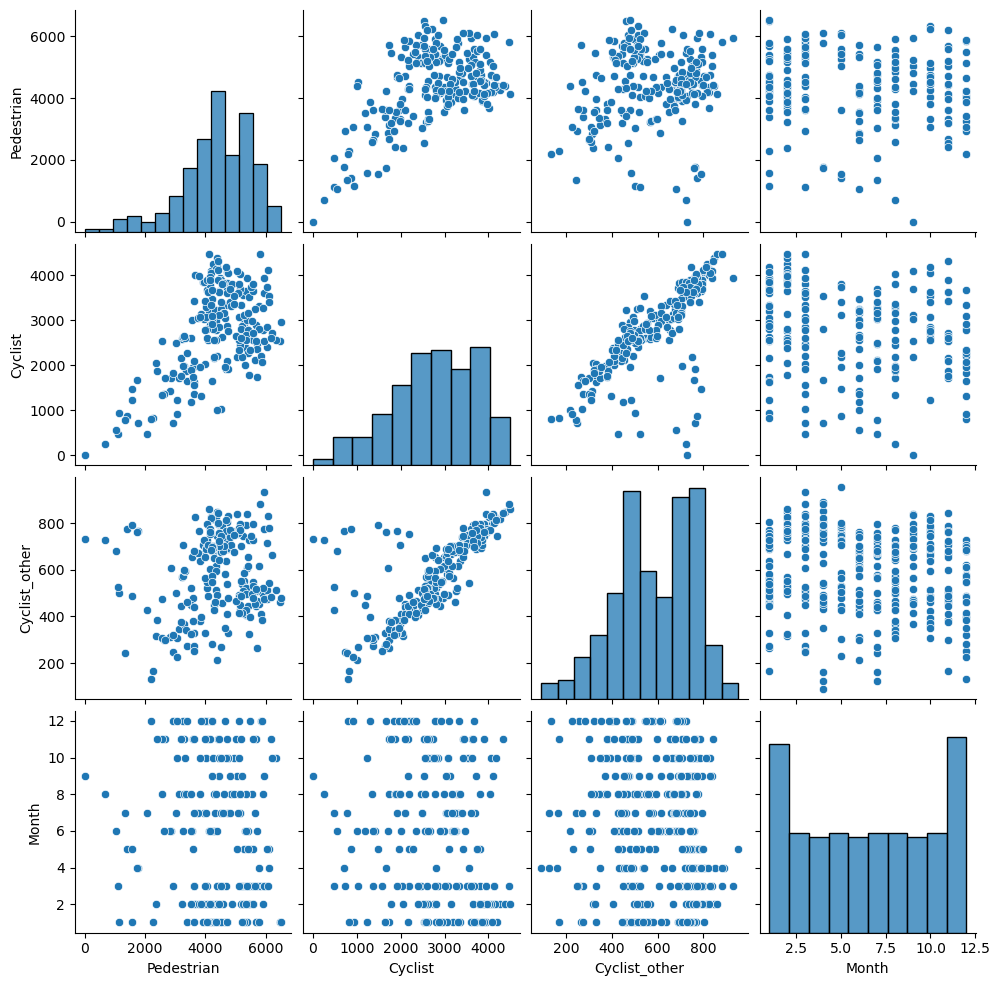

In [14]:
# finding outliers
# roughly 10 to 15 outliers looking at the cyclist vs. cyclist other scatter lying well below the linear trendline
sns.pairplot(auto_counts)

In [15]:
# simple formatting check example
def is_valid_count(count_col):
    if pd.isna(count_col):
        return True
    is_non_neg = count_col >= 0
    is_int = int(count_col) == count_col
    return is_non_neg and is_int

auto_counts.Pedestrian.apply(is_valid_count).sum()

np.int64(365)

## Joining Data
Suppose we want to investigate the effect on climate (eg. temperatures, rainfall) on daily cyclist and pedestrian counts. We could import daily weather data 'BrisbaneDailyWeather.csv' which is gathered from the Bureau of Meteorology. We could then join the datasets together. We need to have an index or column (or set of columns) in common between the datasets in order to join them.

Different types of joins / merge
* inner (default)
* left (use keys from left frame)
* right (use keys from right frame)
* outer (use keys from both frames)

Join is used to join by index, whereas merge is used to join by columns.

Can use left_on and right_on arguments if the joining columns have different names.

In [16]:
# import the 'BrisbaneDailyWeather.csv' file, converting the Data column to datetime format and setting it as the index.
weather = pd.read_csv('Data/BrisbaneDailyWeather.csv', index_col=['Date'], parse_dates=['Date'])
weather

,MinTemp,MaxTemp,Rainfall
Date,,,
2022-02-13,18.6,29.3,7.2
2022-02-12,20.4,28.9,0.0
2022-02-11,19.1,31.3,0.0
2022-02-10,19.4,31.2,0.0
2022-02-09,18.6,30.0,0.0
...,...,...,...
1999-12-15,17.0,27.0,0.0
1999-12-14,17.0,26.0,0.2
1999-12-13,19.0,24.0,0.8


In [17]:
# join the datasets together
auto_counts = auto_counts.join(weather)
auto_counts

,Pedestrian,Cyclist,Cyclist_other,Month,Day,MinTemp,MaxTemp,Rainfall
Date,,,,,,,,
2021-01-01,5710.0,1738.0,265,1,Friday,21.7,29.4,2.4
2021-01-02,6485.0,2538.0,462,1,Saturday,21.5,29.9,1.8
2021-01-03,6525.0,2974.0,479,1,Sunday,22.2,30.1,0.0
2021-01-04,4720.0,2865.0,538,1,Monday,23.2,30.2,0.0
2021-01-05,4690.0,3353.0,637,1,Tuesday,23.4,32.8,1.0
...,...,...,...,...,...,...,...,...
2021-12-27,4644.0,1970.0,351,12,Monday,21.3,28.9,0.0
2021-12-28,3073.0,910.0,224,12,Tuesday,19.6,25.7,14.6
2021-12-29,3875.0,1311.0,397,12,Wednesday,19.1,26.9,0.0


In [18]:
# df1.merge(df2, on=['col1', 'col2', 'col3'])

## Summarising Data
Time permitting, we will now go through some examples of summarising data.

1. How do the counts vary throughout the year? When do they peak?
Counts stay faily stable throughout the year, but look to have minor weekly fluctuations. Have large chunks of missing data for certain parts of the year.

<Axes: title={'center': 'Pedestrian and Cyclist counts at Maritime Mueseum during 2021'}, xlabel='Date', ylabel='Daily Count'>

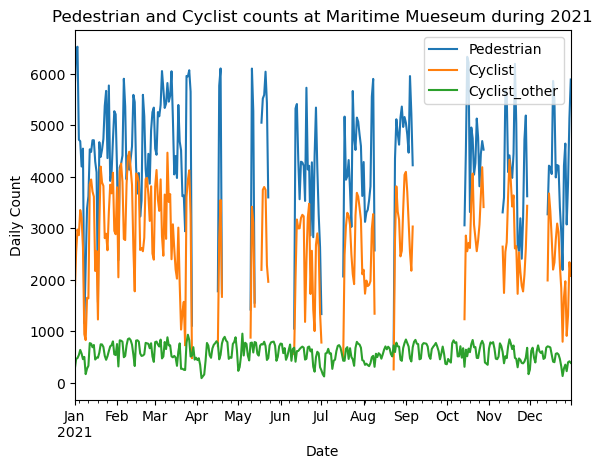

In [21]:
auto_counts.plot(y=['Pedestrian', 'Cyclist', 'Cyclist_other'],
                ylabel='Daily Count',
                title='Pedestrian and Cyclist counts at Maritime Mueseum during 2021')

2. How do the counts vary by day of week. Are there any noticable trends?
Pedestrian counts increase on the weekend, while cyclist counts decrease on the weekend. This makes sense - a lot of cyclists commute to work, and they won't be working on weekends. Southbank is a popular weekend destination for families.

In [25]:
counts_by_day = auto_counts.groupby('Day')[['Pedestrian', 'Cyclist', 'Cyclist_other']].mean()
counts_by_day

/tmp/ipykernel_1797/2639415609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_day = auto_counts.groupby('Day')[['Pedestrian', 'Cyclist', 'Cyclist_other']].mean()


,Pedestrian,Cyclist,Cyclist_other
Day,,,
Monday,3685.161290,2661.225806,600.980769
Tuesday,4214.689655,3047.103448,654.365385
Wednesday,4246.600000,3232.500000,660.769231
Thursday,4140.451613,2990.741935,658.653846
Friday,4175.741935,2747.258065,614.169811
Saturday,5061.032258,2213.096774,444.250000
Sunday,5005.064516,2447.516129,454.365385


<Axes: xlabel='Day', ylabel='Daily average count'>

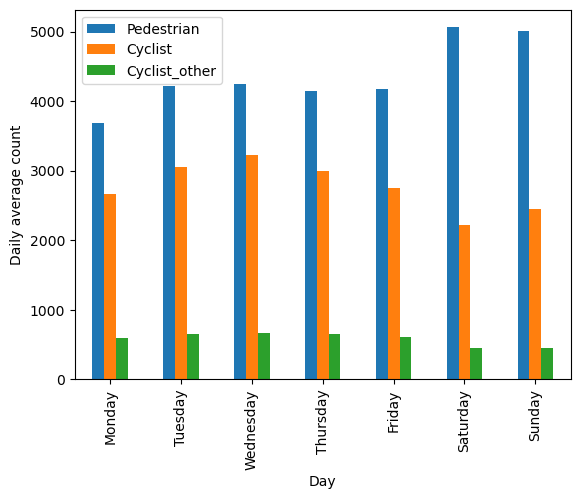

In [29]:
counts_by_day.plot(kind='bar', ylabel='Daily average count')